## Домашнее задание по летней практике № 4

![](41photo.png)

![](42photo.png)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as sc
import pandas as pd

In [2]:
x, y = sp.symbols('x y')

In [3]:
def f2(x, y):
    return sp.sin(x + y + x * y - 0.2)

In [4]:
def not_in(dot: float, list_dot: list) -> bool:
    f = True
    for i in list_dot:
        if abs(dot - i) < 0.1:
            f = False
    return f

In [5]:
def min_root_max(function, tol= None) -> tuple: #  поиск мин корня
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
    local_min = [] # min на одной стороне рамки
    local_root = [] # root на одной стороне рамки
    local_max = [] # max на одной стороне рамки
    for i in np.linspace(0, 3, 6000):
        if abs(function(i) + 1) < tol and not_in(round(i, 3), local_min): # min
            local_min.append(round(i, 3))
        if abs(function(i)) < tol and not_in(round(i, 3), local_root): # root
            local_root.append(round(i, 3))
        if abs(function(i) - 1) < tol and not_in(round(i, 3), local_max): # max
            local_max.append(round(i, 3))
            
    # if len(local_min) == 0:
    #     local_min.append(0) if function(0) <= function(3) else local_min.append(3)
    # if len(local_max) == 0:
    #     local_max.append(3) if function(0) <= function(3) else local_min.append(0)
    return local_min, local_root, local_max

In [6]:
def create_fucntion() -> dict:
    function_y0 = sp.lambdify(x, f2(x, 0)) # y = 0 Bottom side
    function_x3 = sp.lambdify(y, f2(3,  y)) # x = 3 Right side
    function_y3 = sp.lambdify(x, f2(x, 3)) # y = 3 Top side
    function_x0 = sp.lambdify(y, f2(0, y)) # x = 0 Left side
    
    sides = {'нижней(y=0)': function_y0,
         'правой(x=3)': function_x3,
         'верхней(y=3)': function_y3,
         'левой(x=0)': function_x0
        }
    return sides

In [7]:
def min_root_max_frame() -> tuple:
  min = [] # минимумы со всех сторон рамки
  root = [] # корни со всех сторон рамки
  max = [] # максимумы со всех сторон рамки
  for key, value in create_fucntion().items():
    global_min, global_root, global_max = min_root_max(value, 0.001)
    print(f'В  проходе по {key} рамке вычеслены:', 
          f'{global_min=}', 
          f'{global_root=}', 
          f'{global_max=}', 
          sep='\n')
    print()
    
    if key.__contains__('0'):
          if key.__contains__('y'):
            [min.append((i, 0)) for i in global_min]
            [root.append((i, 0)) for i in global_root]
            [max.append((i, 0)) for i in global_max]
          else:
            [min.append((0, i)) for i in global_min]
            [root.append((0, i)) for i in global_root]
            [max.append((0, i)) for i in global_max]
    else:
          if key.__contains__('y'):
            [min.append((i, 3)) for i in global_min]
            [root.append((i, 3)) for i in global_root]
            [max.append((i, 3)) for i in global_max]
          else:
            [min.append((3, i)) for i in global_min]
            [root.append((3, i)) for i in global_root]
            [max.append((3, i)) for i in global_max]
  
  print(f'{min=}', f'{root=}', f'{max=}', sep = '\n')
  return min, root, max

In [8]:
def min_root_max_in_frame() -> tuple:
    min_in = []
    root_in = []
    max_in = []
    for i in np.linspace(0.01, 3, 400):
        function = sp.lambdify(x, f2(x, i))
        global_min, global_root, global_max = min_root_max(function, 0.001)
        [min_in.append((j, i)) for j in global_min]
        [root_in.append((j, i)) for j in global_root]
        [max_in.append((j, i)) for j in global_max]
        
    return min_in, root_in, max_in

In [9]:
def draw_function()  -> None:
    plt.figure(figsize = (10, 10))
    plt.title('Function')
    min, root, max = min_root_max_frame()
    for i in min:
        plt.scatter(i[0], i[1], s = 20, color = 'blue')
    for i in root:
        plt.scatter(i[0], i[1], s = 20, color = 'red')
    for i in max:
        plt.scatter(i[0], i[1], s = 20, color = 'green')
        
    min_in, root_in, max_in = min_root_max_in_frame()
    for i in min_in:
        dmin = plt.scatter(i[0], i[1], s = 20, color = 'blue', label = 'min')
    for i in root_in:
        droot = plt.scatter(i[0], i[1], s = 20, color = 'red', label = 'root')
    for i in max_in:
        dmax = plt.scatter(i[0], i[1], s = 20, color = 'green', label = 'max')
    plt.legend((dmin, droot, dmax), 
               ('min', 'root', 'max'),
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

выполняется порядка минуты

В  проходе по нижней(y=0) рамке вычеслены:
global_min=[]
global_root=[0.199]
global_max=[1.726]

В  проходе по правой(x=3) рамке вычеслены:
global_min=[0.467, 2.038]
global_root=[0.086, 0.871, 1.656, 2.441]
global_max=[1.253, 2.823]

В  проходе по верхней(y=3) рамке вычеслены:
global_min=[0.467, 2.038]
global_root=[0.086, 0.871, 1.656, 2.441]
global_max=[1.253, 2.823]

В  проходе по левой(x=0) рамке вычеслены:
global_min=[]
global_root=[0.199]
global_max=[1.726]

min=[(3, 0.467), (3, 2.038), (0.467, 3), (2.038, 3)]
root=[(0.199, 0), (3, 0.086), (3, 0.871), (3, 1.656), (3, 2.441), (0.086, 3), (0.871, 3), (1.656, 3), (2.441, 3), (0, 0.199)]
max=[(1.726, 0), (3, 1.253), (3, 2.823), (1.253, 3), (2.823, 3), (0, 1.726)]


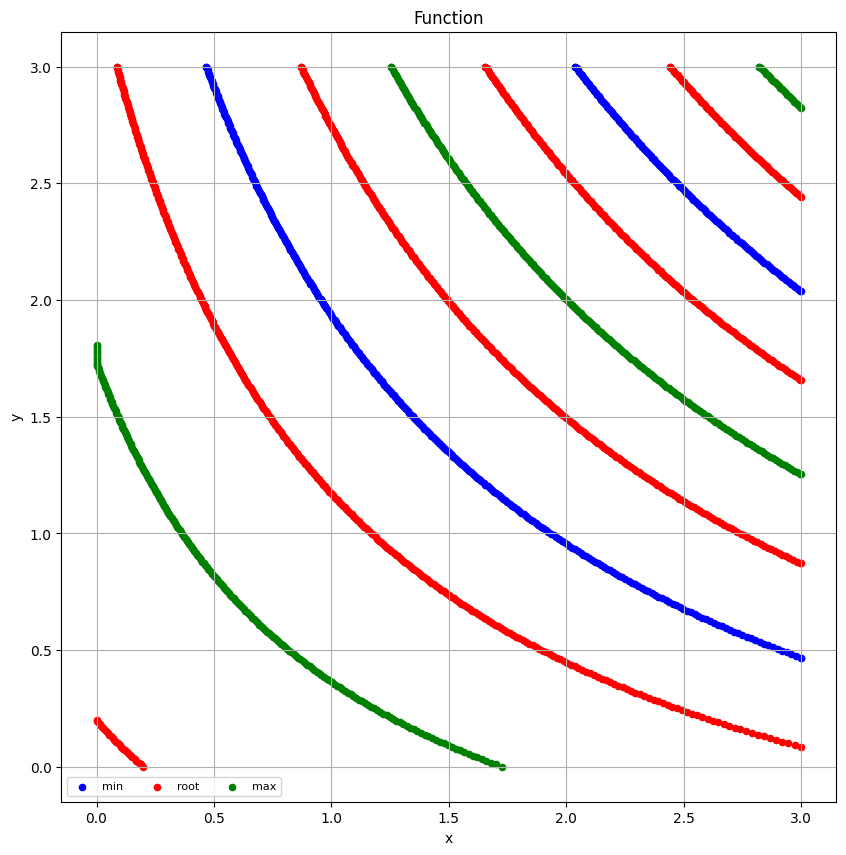

In [10]:
draw_function()

In [11]:
def f2(x, y):
    return np.sin(x + y + x * y - 0.2)

In [12]:
delta_x = np.linspace(-100, 100, 100) # делим по абциссе
delta_y = np.linspace(-100, 100, 100) # делим по ординате

In [13]:
X, Y = np.meshgrid(delta_x, delta_y)
Z = f2(X,Y)

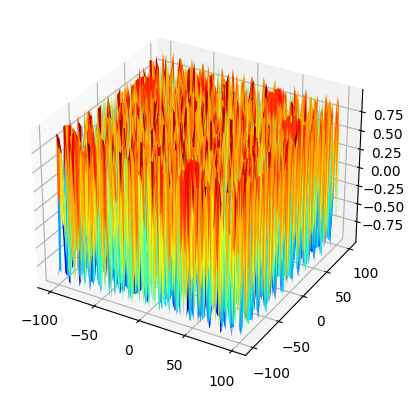

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')

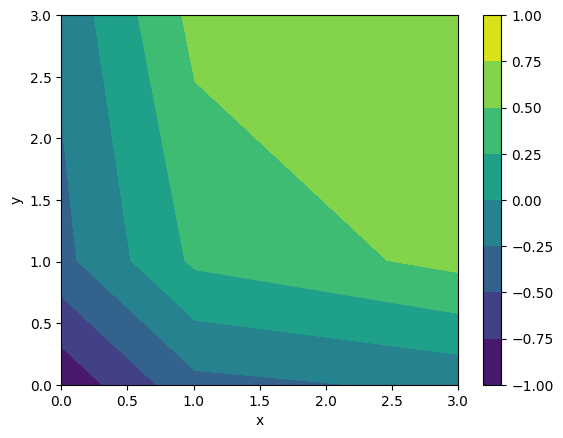

In [15]:
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(right = 3, left = 0)
plt.ylim(top = 3, bottom = 0)
plt.show()